<a href="https://colab.research.google.com/github/JuanPaBL2/Data-Science-Machine-Learning-Proyects-Argentina-Programa-4.0-course-/blob/main/TRABAJO_INTEGRADOR_1_Regresi%C3%B3n_log%C3%ADstica_(grupo_Z_Juan_Del_Rosso)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***TRABAJO INTEGRADOR I- ***
DATOS BASADOS EN INFORMACIÓN PÚBLICA EN ARGENTINA




---
## **Acceso a los diferentes dataset y visualizacion**

#Los dataset podran ser descargado del siguiente [enlace de drive](https://drive.google.com/drive/folders/1J-R6fricR7D1uf9g_Cg8gbIMajCe-eYw?usp=sharing). en algunos casos los datase contiene información de diferentes periodos de tiempo y etiquetas de las variables con nomenclatura específica. Para tener referencia de los datos de cada variables de la base de datos consultar en los siguientes enlaces según el dataset elegido.



|    | Tema | Nombre del archivo | Enlace |
|---|    ---   |         ---         |   ---  |
1   | .... | spam.csv  |  ....   |
2   | supermercados| ventas-supermercados-2.csv  | [dataset de supermercados](https://www.datos.gob.ar/dataset/sspm_455/archivo/sspm_455.1) |
3   | Mercado Central de Bs As |precios-mercadocentral.csv| [dataset de mercado](https://datos.gob.ar/ar/dataset/agroindustria-frutas-hortalizas---precios-mayoristas/archivo/agroindustria_6dce1e87-7988-4eaf-b0e1-b3abbb3964da) |

#Apellido, Nombre, DNI, email de todos los integrantes del grupo
* Del Rosso Juan Pablo. 41.315.883. Juanpablo_delrosso@outlook.com.ar
*
*
*
*

#Redactar en formato resumen la problematica planteado e interes en el análisis del dataset elegido, el impacto que puede llevar a futuro analizar o cruzar información sobre dichas variables ,y cual sería a priori, el modelo a resulado que usted quisiera encontrar en funciones de determinadas condiciones. Esto deberá ser detallado en forma breve a modo de introducción


El interes en el dataset sobre el mercadocentral surge principalmente por la variacion de precio de un mismo producto en diferentes etapas del año, este patron pretendemos entenderlo mejor mediante regresion logistica aislando 2 variables del dataset: precio y tiempo en meses del año, asignando 0 y 1 (barato y caro) para el promedio del precio del producto banana.

_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
_________________________________________________________________
##1- Ingrese el DATA SET

In [2]:
#organizar datos
import pandas as pd
import numpy as np
#graficos
import matplotlib.pyplot as plt
#mejorar visual dataframe
from IPython.display import display
#estandarizar datos
from sklearn.preprocessing import StandardScaler
#CREAR MODELOS APRENDIZAJE SUPERVISADO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
#METRICAS DE EVALUACION
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score
from sklearn.cluster import KMeans
import seaborn as sns

URL = "https://docs.google.com/spreadsheets/d/e/2PACX-1vT8oO07pWQV4SgPMhuirrOugaQKuJKo3oawxKg1PnMD5wikzuObNoQN_T2iZzw4G5wGmZMrpAkR7fvK/pub?output=csv"

dataframe = pd.read_csv(URL)

##2- Aplicar PROCESO de ANÁLISIS EXPLORATORIO DE LOS DATOS (Algunas funciones comúnes que puedes aplicar: .head .info .describe etc).


VISTA PREVIA DATAFRAME MERCADO CENTRAL



,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares
...,...,...,...,...,...,...,...,...,...,...,...
95,32,Argentina,Mercado Central de Buenos Aires,2017,Marzo,Pera,Williams,Argentina,0.64,USD,Dolares
96,32,Argentina,Mercado Central de Buenos Aires,2017,Marzo,Uva,Moscat.Bca,Argentina,1.17,USD,Dolares
97,32,Argentina,Mercado Central de Buenos Aires,2017,Marzo,Cereza,Bing,Argentina,7.56,USD,Dolares
98,32,Argentina,Mercado Central de Buenos Aires,2017,Marzo,Ciruela,Blackamber,Argentina,1.68,USD,Dolares



ESTADISTICAS DESCRIPTIVAS


,pais_id,año,precio_usd_kg
count,828.0,828.000000,767.000000
mean,32.0,2017.376812,1.262360
std,0.0,0.484880,1.437011
min,32.0,2017.000000,0.000000
25%,32.0,2017.000000,0.470000
50%,32.0,2017.000000,0.860000
75%,32.0,2018.000000,1.460000
max,32.0,2018.000000,11.230000



CANTIDAD DE NULOS

pais_id           0
pais              0
mercado           0
año               0
mes               0
producto          0
variedad          0
origen            0
precio_usd_kg    61
moneda_cod        0
moneda            0
dtype: int64


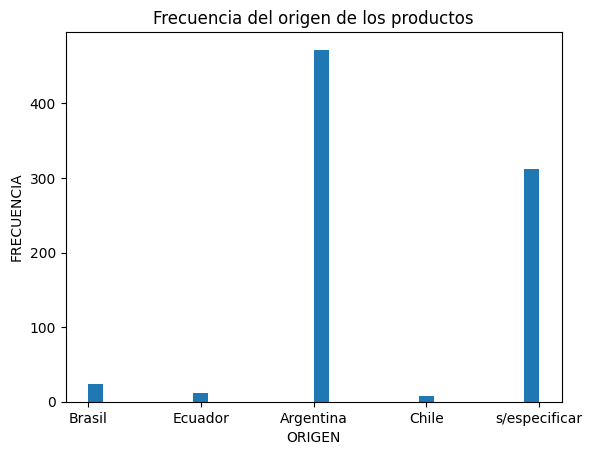

In [3]:
# Mostrar una vista previa del dataframe
print("\nVISTA PREVIA DATAFRAME MERCADO CENTRAL\n")
display(dataframe.head(100))

# Comprobar estadísticas descriptivas
statics = dataframe.describe()
print("\nESTADISTICAS DESCRIPTIVAS")
display(statics)

# Comprobar valores nulos
print("\nCANTIDAD DE NULOS\n")
nulos = dataframe.isnull().sum()
print(nulos)

# Graficar la frecuencia de origen de los productos
plt.hist(dataframe["origen"], bins=30)
plt.xlabel('ORIGEN')
plt.ylabel('FRECUENCIA')
plt.title('Frecuencia del origen de los productos')
plt.show()

##3- Aplicar PROCESO DE LIMPIEZA

In [4]:
# Limpiar nulos
dataframe_limpio = dataframe.dropna()

# Eliminar columnas innecesarias
columnas_innecesarias = ["pais_id", "moneda_cod"]
print("\nVISTA PREVIA DATAFRAME LIMPIO  MERCADO CENTRAL\n")
dataframe_limpio_in = dataframe_limpio.drop(columnas_innecesarias, axis=1)
display(dataframe_limpio_in.head())

#____VARIABLE Y: PROMEDIO PRECIO DE BANANAS____

#calculo precio promedio del producto banana
promedio_precio = dataframe_limpio_in[dataframe_limpio_in['producto'] == 'Banana']['precio_usd_kg'].mean()

dataframe_limpio_in['CaroBarato'] = (dataframe_limpio_in['precio_usd_kg'] > promedio_precio).astype(int)
                                                                  # > promedio precio (compara los valores de 'precio_usd_kg' con la variable promedio y devuelve true/false en formato numero )

#creo nuevo dataframe para la categoria caro/barato del producto banana
table = pd.DataFrame({'caro_o_barato': dataframe_limpio_in['CaroBarato'],'precio': dataframe_limpio_in['precio_usd_kg']})

#muestro nueva tabla para caro/barato para la banana
print("\nTABLA DE PRECIOS DE LA BANANA EN MESES: 0 barato, 1 caro.")
display(table.head(20))
print(f"PRECIO PROMEDIO BANANA: {promedio_precio} USD\n")
print(f"Considerando que el precio promedio es {promedio_precio} USD, cuando el precio sea mayor que el promedio sera caro (1) y cuando sea menor sera barato (0)\n")

#____VARIABLE X: MESES_____#

# Convertir los nombres de los meses a valores numéricos.
meses_a_numeros = {
    "Enero": 1, "Febrero": 2, "Marzo": 3, "Abril": 4, "Mayo": 5, "Junio": 6,
    "Julio": 7, "Agosto": 8, "Septiembre": 9, "Octubre": 10, "Noviembre": 11, "Diciembre": 12
}
dataframe_limpio_in['mes'] = dataframe_limpio_in['mes'].map(meses_a_numeros)




VISTA PREVIA DATAFRAME LIMPIO  MERCADO CENTRAL



,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda
0,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,Dolares
1,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,Dolares
2,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,Dolares
3,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,Dolares
4,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,Dolares



TABLA DE PRECIOS DE LA BANANA EN MESES: 0 barato, 1 caro.


,caro_o_barato,precio
0,1,1.22
1,0,0.53
2,1,0.86
3,1,1.52
4,1,1.84
5,1,1.46
6,1,0.81
7,1,0.85
8,0,0.38
9,1,0.83


PRECIO PROMEDIO BANANA: 0.764 USD

Considerando que el precio promedio es 0.764 USD, cuando el precio sea mayor que el promedio sera caro (1) y cuando sea menor sera barato (0)



##4- Aplicar PROCESO para DEFINIR tu X e Y para APLICAR REGRESION LINEAL Y LOGISTICA segun el DATA SET a las variables que consideres adecuadas. RECUERDA ESTANDARIZAR LAS VARIABLES PARA CORRELACIÓN LOGÍSTICA.


PREDICCIONES PARA NUEVOS DATOS:

       Mes  Predicción
0    Enero           1
1  Febrero           1
2    Marzo           1
3    Abril           1
4     Mayo           1


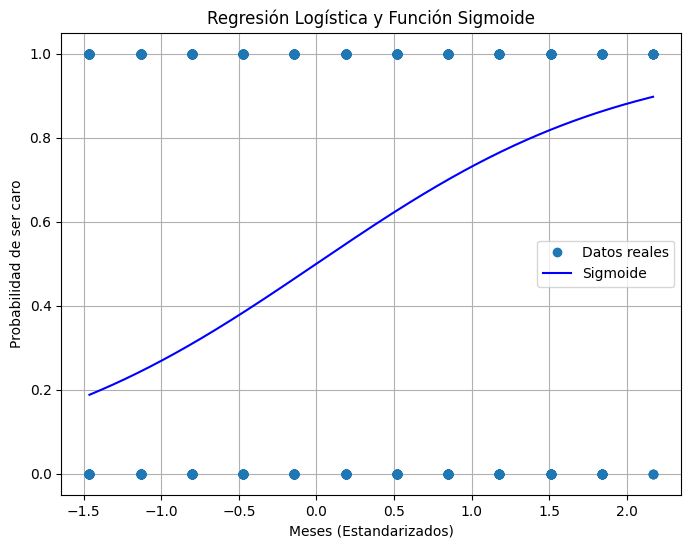

In [5]:
#Dividir datos en características (X) y variable objetivo (y)
X = dataframe_limpio_in["mes"].values.reshape(-1, 1)
y = table["caro_o_barato"]

scaler = StandardScaler()

#Estandarizar las características
X = scaler.fit_transform(X)

#Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Crear un modelo de regresión logística
modelo = LogisticRegression()

#Entrenar el modelo con los datos de entrenamiento
modelo.fit(X_train, y_train)

#Realizar predicciones en el conjunto de prueba
predicciones = modelo.predict(X_test)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

#Graficar la función sigmoide
x_range = np.linspace(X.min(), X.max(), 1000)
y_sigmoid = sigmoid(x_range)

plt.figure(figsize=(8, 6))
plt.plot(X, y, 'o', label='Datos reales')
plt.plot(x_range, y_sigmoid, label='Sigmoide', color='b')
plt.xlabel('Meses (Estandarizados)')
plt.ylabel('Probabilidad de ser caro')
plt.title('Regresión Logística y Función Sigmoide')
plt.grid(True)
plt.legend()

#Realizar predicciones para nuevos datos
nuevos_meses = ["Enero", "Febrero", "Marzo", "Abril", "Mayo"]
nuevos_datos_numeros = [meses_a_numeros[mes] for mes in nuevos_meses]
nuevos_datos_estandarizados = scaler.transform(np.array(nuevos_datos_numeros).reshape(-1, 1))
nuevas_predicciones = modelo.predict(nuevos_datos_estandarizados)

nuevos_resultados = pd.DataFrame({'Mes': nuevos_meses, 'Predicción': nuevas_predicciones})
print("\nPREDICCIONES PARA NUEVOS DATOS:\n")
print(nuevos_resultados)


##5- Aplicar alguna METRICAS de EVALUACION a los modelos anteriores y justificar la elección de dicha métrica.

Precisión: 54.55 %

Matriz de confusión:

[[ 0 70]
 [ 0 84]]

Grafico Matriz de confusion: 


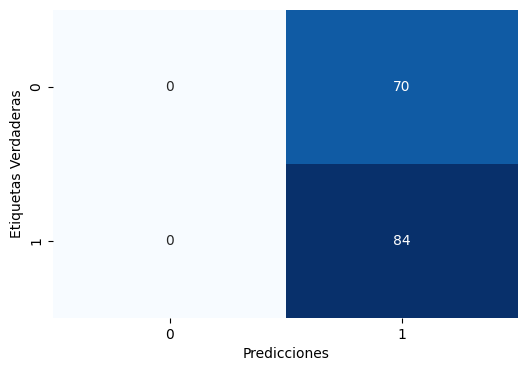

In [6]:
#________PRECISION_______


precision = precision_score(y_test, predicciones)
print(f"Precisión: {precision * 100:.2f} %")

#_______MATRIZ DE CONFUSION_______

print("\nMatriz de confusión:\n")
confusion_mat = confusion_matrix(y_test, predicciones)
print(confusion_mat)

# Graficar la matriz de confusión
print("\nGrafico Matriz de confusion: ")
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_mat, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicciones")
plt.ylabel("Etiquetas Verdaderas")
plt.show()


##6- Sacar una conclusión en función de los resultados, errores, y predicciones.



**Resultados:**
Al analizar los resultados del modelo, se destaca que a medida que transcurren los meses representados en el eje X, la curva se acerca más al valor 1 (indicando precios más caros) y se mantiene cercana a este valor a lo largo del tiempo.

---

**Predicciones:**
La proyección sugiere que los precios de las bananas tienden a ser ligeramente menos económicos a medida que avanzan los meses.

---

**Errores:**
1.  ***Matriz de Confusión***:

El modelo ha logrado identificar con precisión todas
las instancias de ambas clases (positiva y negativa) en este conjunto de datos. No se registraron errores, y el modelo mostró un rendimiento perfecto en esta situación particular.

* Verdaderos Negativos (TN): 70, lo que significa que 70 instancias que eran
negativas se clasificaron correctamente como negativas.

* Falsos Positivos (FP): 0, indicando que no se cometieron errores al clasificar instancias negativas como positivas.

* Falsos Negativos (FN): 0, lo que implica que no hubo errores al clasificar instancias positivas como negativas.

* Verdaderos Positivos (TP): 84, denotando que 84 instancias positivas se clasificaron correctamente como positivas.

.
2. ***Precisión:***

Con una precisión del 54.54%, podríamos considerarla relativamente baja, sugiriendo que el modelo no se desempeña de manera óptima en la clasificación de las muestras. Esto podría deberse a la necesidad de mejoras en el modelo o a la complejidad del conjunto de datos. Idealmente, se busca una precisión más alta, especialmente en problemas donde la exactitud es crítica.

##7- Aplicar un MODELO DE APRENDIZAJE NO SUPERVISADO (k-means, arbol de  decisión, KNN) Con el resultado obtenido del algoritmo de agrupamiento elegido, agregar al dataset una columna con esta nueva variables del grupo al que pertenece cada dato.


Cambiamos a numerica las variables categoricas para poder analizarlo

In [7]:
categorica = dataframe_limpio.filter(['mes','producto'])
categorica.head()

,mes,producto
0,Enero,Anana
1,Enero,Banana
2,Enero,Pomelo
3,Enero,Limón
4,Enero,Manzana


In [8]:
cat_num_mes = pd.get_dummies(categorica,columns=['mes','producto'],drop_first=False)
cat_num_mes.head()

,mes_Abril,mes_Agosto,mes_Diciembre,mes_Enero,mes_Febrero,mes_Julio,mes_Junio,mes_Marzo,mes_Mayo,mes_Noviembre,...,producto_Pimiento,producto_Pomelo,producto_Radicheta,producto_Remolacha,producto_Repollo,producto_Tomate,producto_Uva,producto_Zanahoria,producto_Zapallito,producto_Zapallo
0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
meses = dataframe_limpio.groupby(['mes'])
meses.head(5)

,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares
43,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Anana,Perola,Brasil,1.52,USD,Dolares
44,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Banana,Cavdich,Ecuador,0.87,USD,Dolares
45,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Pomelo,Star Ruby,Argentina,1.16,USD,Dolares
46,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Limón,Eureka,Argentina,1.47,USD,Dolares
47,32,Argentina,Mercado Central de Buenos Aires,2017,Febrero,Manzana,Granny Smith,Argentina,1.93,USD,Dolares


In [10]:
mes_ = {'Enero':1 ,'Febrero':2,'Marzo':3,'Abril':4,'Mayo':5,'Junio':6,'Julio':7,'Agosto':8,'Septiembre':9,'Octubre':10,'Noviembre':11,'Diciembre':12}
producto = {'Anana':1,'Banana':2,'Pomelo':3,'Limón':4}

In [11]:
dataframe_limpio['new_mes'] = dataframe_limpio['mes'].map(mes_)
dataframe_limpio

<ipython-input-11-64306ce1feb9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataframe_limpio['new_mes'] = dataframe_limpio['mes'].map(mes_)


,pais_id,pais,mercado,año,mes,producto,variedad,origen,precio_usd_kg,moneda_cod,moneda,new_mes
0,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Anana,Perola,Brasil,1.22,USD,Dolares,1
1,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Banana,Cavdich,Ecuador,0.53,USD,Dolares,1
2,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Pomelo,Star Ruby,Argentina,0.86,USD,Dolares,1
3,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Limón,Eureka,Argentina,1.52,USD,Dolares,1
4,32,Argentina,Mercado Central de Buenos Aires,2017,Enero,Manzana,Granny Smith,Argentina,1.84,USD,Dolares,1
...,...,...,...,...,...,...,...,...,...,...,...,...
823,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Repollo,s/especificar,s/especificar,0.36,USD,Dolares,8
824,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Tomate,s/especificar,s/especificar,1.15,USD,Dolares,8
825,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zanahoria,s/especificar,s/especificar,0.29,USD,Dolares,8
826,32,Argentina,Mercado Central de Buenos Aires,2018,Agosto,Zapallito,s/especificar,s/especificar,1.01,USD,Dolares,8


analizamos k-means

In [12]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min



[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 1 2 1 2 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 2 3 2 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 2 3 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 1 1 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 

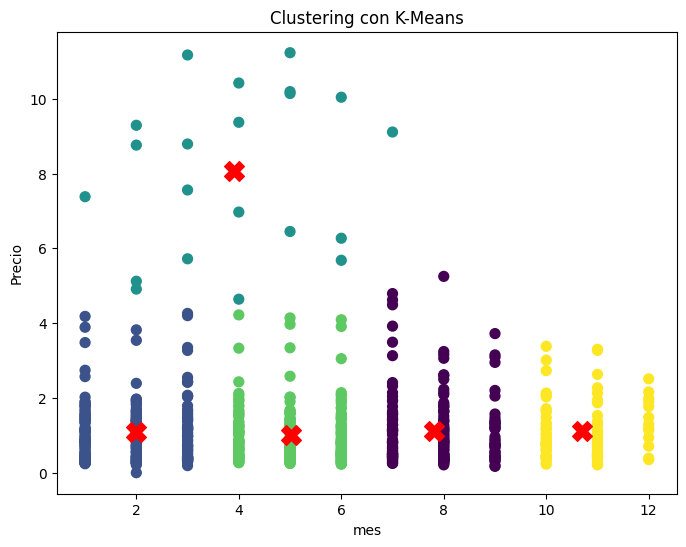

In [13]:
# Crear objeto KMeans
n_clusters = 5
n_init = 100 #limite de iteraciones
kmeans = KMeans(n_clusters=n_clusters, n_init=n_init)#Definiendo el modelo

X = dataframe_limpio[['new_mes','precio_usd_kg']]
# Ajustar el modelo a los datos
kmeans.fit(X)

# Obtener etiquetas y centroides
labels = kmeans.labels_
print(labels)

centroids = kmeans.cluster_centers_
print(centroids)
# Visualizar resultados
plt.figure(figsize=(8, 6))
plt.scatter(X['new_mes'], X['precio_usd_kg'], c=labels, s=50, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200)
plt.title("Clustering con K-Means")
plt.xlabel("mes")
plt.ylabel("Precio")
plt.show()

##8- Generar una conclusión con relación a como podría obtener mejores datos en este dataset, o que información considera importante que se podria evaluar para mejorar su predicción encontrada.

Quizas usando un modelo de aprendizaje supervisado de tipo REGRESION LOGISTICA MULTIVARIADA, se podrian
 predecir mejores resultados ya que este toma mas cantidad de variables categoricas para la variable independiente.
Por ejemplo, tomando como variables categoricas: origen del producto, variedad, producto y precio promedio;
 en funcion del tiempo en meses podria observarse como el pais de origen de un producto y la variedad pueden modificar el
precio segun cierto mes y asociar que los productos de tal pais y tal variedad tienen mayor precio en cierto mes debido
 a que dichas variables categoricas hacen a un mejor producto para el clima de ese mes.
o asociarlo a la cantidad de cosecha de la variedad y el origen para determinado mes.   